# ER estimator 

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.tabular import *
from fastai.metrics import *

## Other data formats

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [76]:
file = '/content/drive/My Drive/20190919-to-20190921.csv'
# with open(path, 'w') as f:
#   f.write('Hello Google Drive!')
!ls "drive/My Drive/20190919-to-20190921.csv"

'drive/My Drive/20190919-to-20190921.csv'


In [77]:
 path = Path('.')
(path/"").ls()

[PosixPath('.config'),
 PosixPath('drive'),
 PosixPath('models'),
 PosixPath('sample_data')]

In [106]:
df = pd.read_csv(file)
df = df.drop(columns=["sid","time","r_site_iab_cats","g_event_id"])
df.head()

,r_dow,r_hod,a_er_cat,a_app_id,a_campaign_type_id,a_camp_id,a_group_id,r_source_id,c_id,r_site_id,r_country_id,r_region_code,r_platform,r_network_type,r_traffic_type,c_type,c_cta,c_text,c_size,s_gerry_type,s_caesar_id,response
0,0,19,0,2214,2,6732,15102,69,6372771,28490031.0,244,23,ANDROID,cellular,app,HTML,XEM NGAY,ƯU ĐÃI ĐẾN 60%,3200480,NaN,NaN,0
1,0,20,0,1087,2,25179,25740,253,6371282,28641080.0,32,NaN,ANDROID,wifi,app,IMAGE,NaN,NaN,3200480,NaN,NaN,0
2,0,20,0,1061,2,25401,26160,69,6381865,27629513.0,106,30,ANDROID,cellular,app,HTML,Pesan Sekarang,"Saat waktu tak memberi \nbanyak pilihan, cek G...",4800320,0.0,NaN,0
3,0,20,0,2214,2,6732,15102,259,6372757,28586913.0,244,44,ANDROID,wifi,app,HTML,XEM NGAY,ƯU ĐÃI ĐẾN 60%,3200480,NaN,NaN,0
4,0,20,0,1088,2,25181,26511,74,6381396,28120963.0,32,07,IOS,wifi,app,IMAGE,NaN,NaN,3000250,NaN,NaN,0


In [79]:
df.columns

Index(['r_dow', 'r_hod', 'a_er_cat', 'a_app_id', 'a_campaign_type_id',
       'a_camp_id', 'a_group_id', 'r_source_id', 'c_id', 'r_site_id',
       'r_country_id', 'r_region_code', 'r_platform', 'r_network_type',
       'r_traffic_type', 'c_type', 'c_cta', 'c_text', 'c_size', 's_gerry_type',
       's_caesar_id', 'response'],
      dtype='object')

In [0]:
We can define a bunch of Transforms that will be applied to our variables. Here we transform all categorical variables into categories. We also replace missing values for continuous variables by the median column value and normalize those.

In [0]:
procs = [FillMissing, Categorify, Normalize]

To split our data into training and validation sets, we use valid indexes

In [81]:
valid_idx = range(int(len(df)*0.9), len(df))
valid_idx

range(864345, 960384)

let's split our variables into categorical and continuous variables (we can ignore the label variable at this stage). fastai will assume all variables that aren't labels or categorical are continuous, unless we explicitly pass a list to the cont_names parameter when constructing our DataBunch.

In [110]:
label = 'response'
cat_names = [cat for cat in df.columns][:-1]
cat_names

['r_dow',
 'r_hod',
 'a_er_cat',
 'a_app_id',
 'a_campaign_type_id',
 'a_camp_id',
 'a_group_id',
 'r_source_id',
 'c_id',
 'r_site_id',
 'r_country_id',
 'r_region_code',
 'r_platform',
 'r_network_type',
 'r_traffic_type',
 'c_type',
 'c_cta',
 'c_text',
 'c_size',
 's_gerry_type',
 's_caesar_id']

ready to pass this information to TabularDataBunch.from_df to create the DataBunch that we'll use for training.

In [111]:
data = TabularDataBunch.from_df(".", df, label, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
print(data.train_ds.cont_names)

[]


In [84]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[  2  15   1  30 ...   0   8   2   0]
 [  2  24   1  17 ...   0   4   3   0]
 [  4   8   1  11 ... 140   8   0   0]
 [  4  14   1  25 ...   0   8   0   0]
 [  4  16   1  68 ... 315   1   0   0]]
[0 0 0 0 0]
[0 0 0 0 0]


Why I used Beta(1):
http://www.marcelonet.com/snippets/machine-learning/evaluation-metrix/f-beta-score

In [0]:
f1_score =FBeta(average='macro',beta = 1) #partial(fbeta, thresh=0.2, beta = 1)
learn = tabular_learner(data, layers=[200,100], emb_szs={'r_platform': 10}, metrics=[accuracy,f1_score])
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,f_beta,time


In [0]:
learn.save('stage-1')

In [100]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


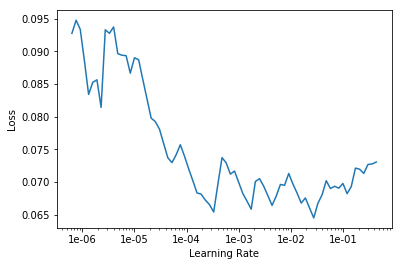

In [101]:
learn.recorder.plot()

In [102]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-1))

ZeroDivisionError: ignored